In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.style.use('tableau-colorblind10')

In [4]:
train_labels_df = pd.read_csv("../data/raw/train_labels.csv")
train_values_df = pd.read_csv("../data/raw/train_values.csv")
train_df = train_values_df.merge(train_labels_df, on='building_id', how='inner')
train_df['damage_grade'] = train_labels_df['damage_grade'].replace({1: 'Low damage', 2: 'Medium damage', 3: 'Serious damage'})

In [5]:
train_labels_df['damage_grade'] = train_labels_df['damage_grade'].replace({1: 'Low damage', 2: 'Medium damage', 3: 'Serious damage'})

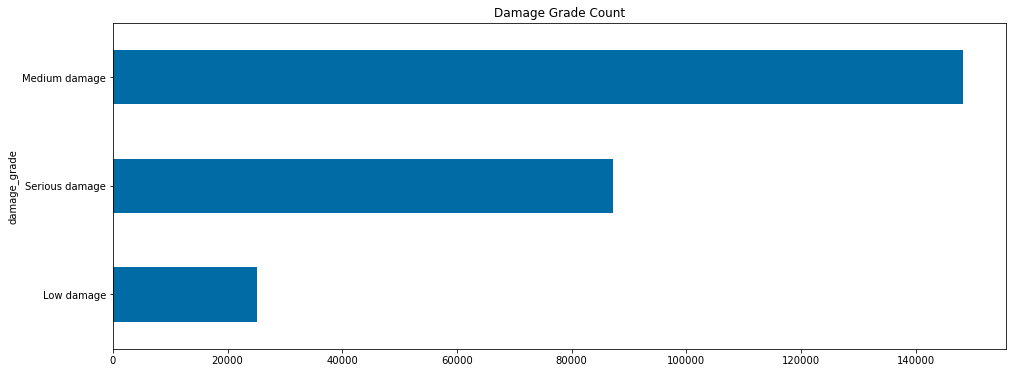

In [6]:
train_labels_df.groupby('damage_grade').size().sort_values().plot.barh(title='Damage Grade Count',figsize=(16,6))
plt.show()

In [7]:
train_values_df.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [8]:
train_labels_df.columns

Index(['building_id', 'damage_grade'], dtype='object')

Deseamos ver la relacion entre el daño en las edificaciones y el nro de pisos, como primer hipotesis podemos pensar que los edificios con mayor altura tienen mayor resistencia estructural, pero debido a que nos encontramos en pais en desarrollo tendriamos que analizar tambien como afecta la antiguedad de los mismos.

Para ello como primer analisis podemos ver la cantidad de pisos de las edificaciones

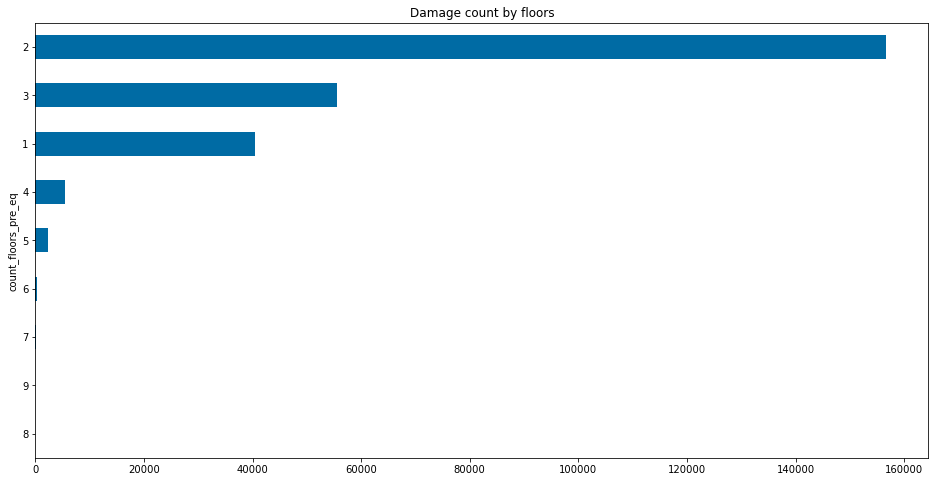

In [15]:
train_values_df.groupby('count_floors_pre_eq').size().sort_values().plot.barh(title='Damage count by floors',figsize=(16,8))
# Save graphic
plt.savefig('../reports/figures/floors_count.png')
plt.show()
plt.show()

In [10]:
train_values_df['count_floors_pre_eq'].value_counts(normalize=True)

2    0.601007
3    0.213418
1    0.155184
4    0.020813
5    0.008619
6    0.000802
7    0.000150
9    0.000004
8    0.000004
Name: count_floors_pre_eq, dtype: float64

Como primer observacion podemos ver que en los registros que la mayor cantidad de edificaciones son de uno dos y tres pisos. Ademas los edicicios de 2 pisos representan el 60% del total de registros algo llamativo.

Veamos como fue el daño recibido en las eficaciones de al menos cuatro pisos 

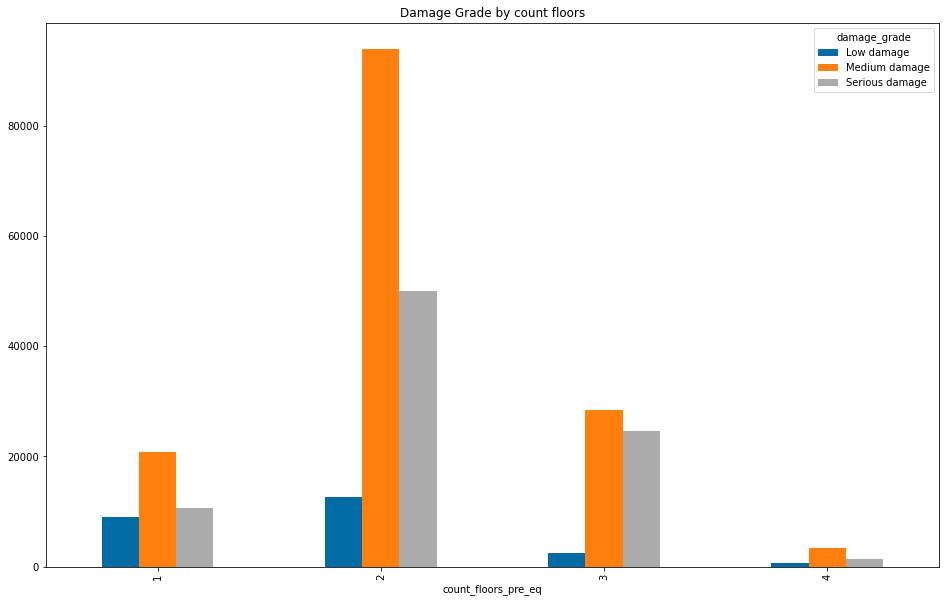

In [11]:
#floors_damage_df = train_values_df.merge(train_labels_df, on='building_id', how='inner')
condicion = train_df['count_floors_pre_eq'].isin([1,2,3,4])
columnas = ['count_floors_pre_eq','damage_grade']
floors_damage_df = train_df.loc[condicion, columnas]
floors_damage_df.groupby(['count_floors_pre_eq', 'damage_grade']).size().unstack(fill_value=0).plot.bar(title='Damage Grade by count floors', figsize=(16,10))
# Save graphic
plt.savefig('../reports/figures/Damage_floors.png')
plt.show()
plt.show()

Podemos observar que las edificaciones de dos pisos son las que mas reciben daño de grado medio, las edificaciones de tres pisos reciben daño de grado medio y alto

Veamos como algunas estadisticas de la antiguedad de la edificacion

In [12]:
train_values_df['age'].describe()

count    260601.000000
mean         26.535029
std          73.565937
min           0.000000
25%          10.000000
50%          15.000000
75%          30.000000
max         995.000000
Name: age, dtype: float64

Podemos observar que el valor medio de la antiguedad es 26 años pero tenemos una varianza muy alta, esto se puede deber a que tenemos valores muy dispersos ya que el max valor es 995. Para comprender un poco mas los datos realizaremos un histograma con una ventana de 10 años

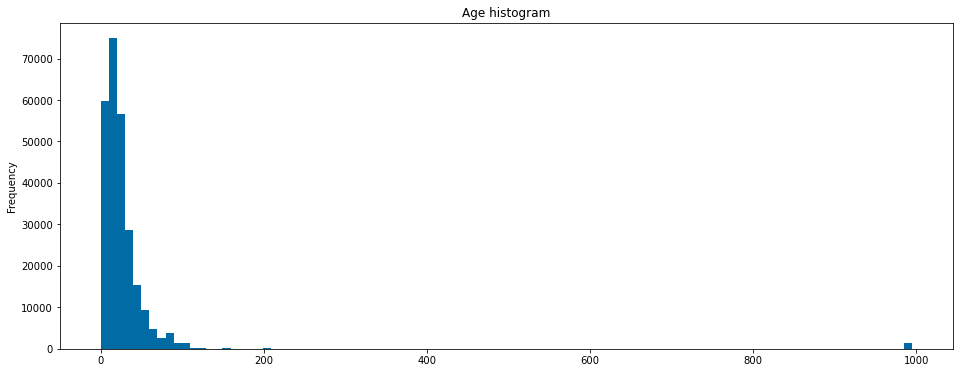

In [13]:
train_df['age'].plot.hist(bins=100,title='Age histogram',figsize=(16,6))
# Save graphic
plt.savefig('../reports/figures/age_hist.png')
plt.show()

Podemos observar que los años se concentran en un rango de entre 0 y 200 años, ademas tenemos datos cercanos a 1000 años estos pueden ser edificaciones muy antiguas que sufriron daños en el terremoto. Para nuestro analisis tomaremos el rango de 0 a 200 años ya que la cantidad de edificaciones fuera de este rango son mucho menores .

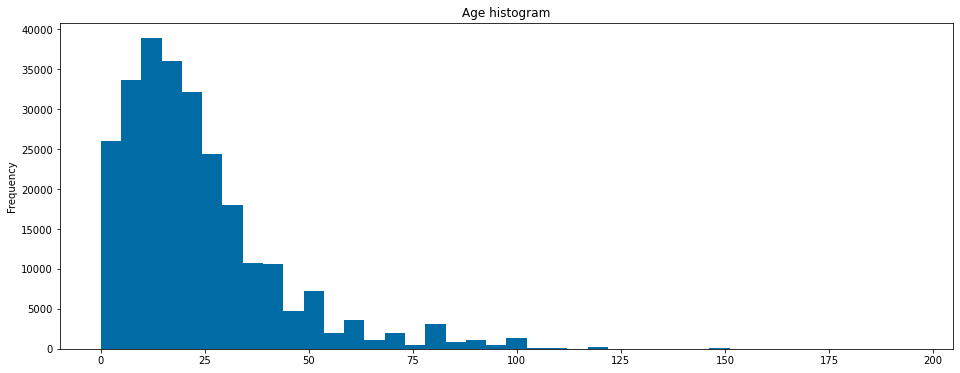

In [14]:
train_values_df[train_values_df['age']<200]['age'].plot.hist(bins=40,title='Age histogram',figsize=(16,6))
# Save graphic
plt.savefig('../reports/figures/age_hist1.png')
plt.show()

Podemos observar una distribucion asimetrica, con una asimetria  